In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import os

#import pandas
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error



import tensorflow as tf

from tensorflow.keras import layers

In [2]:
caracteres={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

In [20]:
VOCABULARIO=len(caracteres)
LONGITUD=6
FICHERO_PESOS="modelos/pesosRNN2.hdf5"

In [90]:
#iniciar=True

#Indicamos un valor de semilla para el generador de números aleatorios
np.random.seed(7)
#dataset = pandas.read_csv('entrenamiento1.csv', engine='python')
dataset=np.array(range(10000))
#print(dataset)
#datos=[]
entrenamiento=[]
salida=[]

textoEntrada=[];

for i in range(len(dataset)):
    textoEntrada+=(caracteres[c] for c in list(format(dataset[i], "0"+str(LONGITUD))))
#print (textoEntrada)
for i in range(len(textoEntrada)-LONGITUD):
    entrenamiento.append(textoEntrada[i:i+LONGITUD])
    salida.append(textoEntrada[i+LONGITUD])
#print(datos)
#print(entrenamiento)
#print(salida)

entrenamiento = np.array(entrenamiento)
#print(entrenamiento.shape)
entrenamiento = np.reshape(entrenamiento, (entrenamiento.shape[0], entrenamiento.shape[1], 1))
entrenamiento = entrenamiento/float(VOCABULARIO)

salida = np.array(salida)
salida = tf.keras.utils.to_categorical(salida)
print(entrenamiento.shape)
print(salida.shape)

#dataset=dataset.values
#dataset=dataset.astype('float32')

##normalizamos los datos. Normalizar es poner entre [0,1]
#escaler = MinMaxScaler(feature_range=(0, 1))
#datos = escaler.fit_transform(datos)
#datos=np.array(datos)
#datos=datos/float(10)
#print(datos)

##Separamos los datos 
#tamañoEntranamiento = int(len(dataset) * 0.67)
#entrenamiento, test = dataset[0:tamañoEntranamiento,:], dataset[tamañoEntranamiento:len(dataset),:]
#print(entrenamiento, test)
#print(len(entrenamiento),len(test),len(dataset))

(59994, 6, 1)
(59994, 10)


In [32]:
def construirModelo(vocabulario=VOCABULARIO, longitud=LONGITUD):
    model = tf.keras.Sequential()
    model.add(layers.LSTM(256, input_shape = (longitud, 1), return_sequences = True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(256))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(vocabulario, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    return model



In [ ]:
model = construirModelo(VOCABULARIO)
if(os.path.isfile(FICHERO_PESOS) and not iniciar):
    model.load_weights(FICHERO_PESOS)
iniciar=False

checkpoint = tf.keras.callbacks.ModelCheckpoint(FICHERO_PESOS, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(entrenamiento, salida, validation_split=0.05, epochs = 10, batch_size = 128, callbacks = callbacks_list, shuffle=True).history



Train on 56994 samples, validate on 3000 samples
Epoch 1/10
26112/56994 [============>.................] - ETA: 29s - loss: 0.3016 - accuracy: 0.8917

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 6, 256)            264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 256)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 792,074
Trainable params: 792,074
Non-trainable params: 0
_________________________________________________________________
None


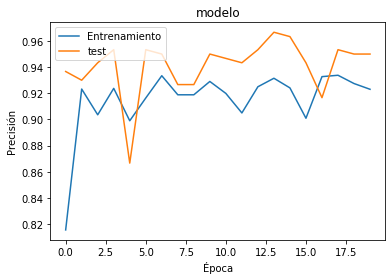

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#from pylab import rcParams
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcPatams['figure.figsize']=12, 5
print(model.summary())
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'test'],loc='upper left')

In [87]:
model = construirModelo(VOCABULARIO)
model.load_weights(FICHERO_PESOS)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [81]:
import ipywidgets as widgets
#from IPython.display import clear_output
textoOriginal = []
prediccion = []
def submit(datos):
    global textoOriginal
    global prediccion
    
    listaTextoCompleto = list(text.value)
    if(len(listaTextoCompleto)<LONGITUD):
        listaCaracteresSinProcesar = ['0' for i in range(LONGITUD-len(listaTextoCompleto))]+listaTextoCompleto[:len(listaTextoCompleto)]
    else:
        indice=len(listaTextoCompleto)-LONGITUD
        listaCaracteresSinProcesar = listaTextoCompleto[indice:indice+LONGITUD]
    
    textoProcesado = listaTextoCompleto[:len(textoOriginal)]    
    textoCompleto = text.value    
    #palabraSinProcesar.append(' ')
    
    textoAnterior = [caracteres[c] for c in textoProcesado]
    ultimoTexto = [caracteres[c] for c in listaCaracteresSinProcesar]
    
    #Alimentamos la red con toda la entrada anterior
    #TODO
    
    
    numero=[]
    for i in range(LONGITUD):
        #X=np.array([ultimoTexto])
        X = np.reshape(ultimoTexto, (1, LONGITUD, 1))
        siguienteNumero = model.predict((X/float(VOCABULARIO)))
        #print(siguienteNumero)
        siguienteNumero=np.argmax(siguienteNumero)
        ultimoTexto.append(siguienteNumero)
        ultimoTexto = ultimoTexto[1:]
        numero.append(str(siguienteNumero))
        
    #
    pronostico.clear_output()
    with pronostico:
        print( ''.join(numero))
    
    #display(text)
    #text.focus_set()

In [89]:
pronostico=widgets.Output()

text = widgets.Text(continuous_update=True)
text.value="000006"
display(text,pronostico)
submit([])
text.on_submit(submit)
text.observe(submit)


Text(value='000006')

Output()